Exercise 2

Perform Clustering

Question 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [10]:
#Get the datasets
#paths of the data in the drive
corona_virus_new_fasta = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/Q2/Coronaviridae_2019_new.fasta'
corona_virus_new_text = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/Q2/Coronaviridae_2019_new_information_table.txt'

corona_virus_old_fasta = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/Q2/Coronaviridae_old.fasta'
corona_virus_old_text = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/Q2/Coronaviridae_old_information_table.txt'



In [15]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.8 MB/s eta 0:00:00


In [16]:
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:


def processSequences(seqNew, seqOld):

  # reads the virus sequences from two fasta files
  sequences1 = [str(record.seq) for record in SeqIO.parse(seqNew, "fasta")] #new file
  sequences2 = [str(record.seq) for record in SeqIO.parse(seqOld, "fasta")] #old file

  print(sequences1[1])
  print(sequences2[1])

  print("------")
  print(sequences1[2])
  print(sequences2[2])
  #Only keep relevant nucleotide sequences
  # new_seqList1 = []
  # new_seqList2 = []

  #removes letters like 'N' etc
  # for seq in sequences1:
  #     new_seq1 = ''.join([char for char in  seq if char == 'A' or char == 'G'or char == "C" or char == 'T'])
  #     new_seqList1.append(new_seq1)

  # for seq in sequences2:
  #     new_seq2 = ''.join([char for char in  seq if char == 'A' or char == 'G'or char == "C" or char == 'T'])
  #     new_seqList2.append(new_seq2)
  
  #concatenate the lists of processed sequences
  newSeq = sequences1 + sequences2
  

  return sequences1, sequences2, newSeq







In [17]:
sequences1, sequences2, newSeq = processSequences(corona_virus_new_fasta,corona_virus_old_fasta)
print(len(sequences1))
print(len(sequences2))
# print(len(new_seqList1))

import itertools



# def get_kmers(sequence, k):
#     kmers = []
#     for i in range(len(sequence) - k + 1):
#         kmers.append(sequence[i:i+k])
#     return kmers

def get_normalized_kmer_counts(sequences, k):
    nucleotides = 'ACTG'
    kmers = list(itertools.product(nucleotides, repeat=k))
    # print("list of kmers:", kmers)
    bigList =[]
    
    for sequence in sequences:
        sequence = sequence.upper()
        # print("sequence:", sequence)
        kmer_counts = {}
        for kmer in kmers:
          # print("kmer:", kmer)
          kmer = "".join(list(kmer))
          if kmer in sequence:
              count = sequence.count(kmer)
              kmer_counts[kmer] = count  
        # total = sum(kmer_counts.values())
        # normalized_dict = {k: v/total for k, v in kmer_counts.items()}
        bigList.append(kmer_counts)
        
    return bigList



k = 4
# newSeqDict = get_normalized_kmer_counts(newSeq, k)

# print("newSeqDict:", newSeqDict)
# print("length of newSeqDict:", len(newSeqDict))
# oldSeqDict = get_normalized_kmer_counts(sequences2)
# print("newSeqDict:", newSeqDict)
# mergedDict = get_normalized_kmer_counts(newSeq)
# mergedDict = df_combined = pd.concat([newSeqDict, oldSeqDict])

# print(newSeqDict)
# print(mergedDict)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [18]:
newSeq = get_normalized_kmer_counts(newSeq, k)#returns a list of kmer dictionary
print(len(newSeq))

366


In [19]:
pcaVectorList = []
for seq_dict in newSeq:
  v=[]
  for key, val in seq_dict.items():
    v.append(val)
  pcaVectorList.append(v)

In [20]:
pcaVector_array = np.array(pcaVectorList)
pcaVector_array.shape

(366, 256)

In [21]:
pcaVector_array

array([[194, 191, 244, ...,  31,  55,  14],
       [194, 191, 244, ...,  31,  55,  14],
       [194, 191, 244, ...,  31,  55,  14],
       ...,
       [168, 148, 215, ...,  30,  62,   9],
       [119, 146, 116, ...,  33,  46,  16],
       [199, 196, 246, ...,  25,  56,  13]])

(366, 2)
(366, 256)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


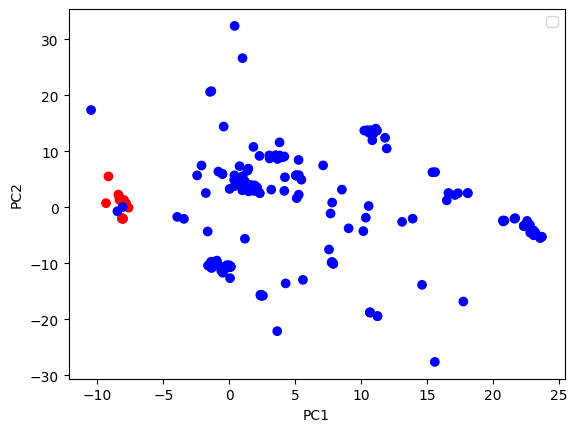

In [22]:


# perform dimensionality reduction using PCA
import numpy as np
from sklearn.preprocessing import StandardScaler


# perform clustering using k-means
n_components = 2  # update to be no greater than the number of features
pca = PCA(n_components=2)
scaler = StandardScaler()
norm_pca = scaler.fit_transform(pcaVector_array)
X_pca = pca.fit_transform(norm_pca)
print(np.array(X_pca).shape)
print(pcaVector_array.shape)
# print("X_pca:", X_pca)
# perform clustering using k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
labels = kmeans.labels_
# print(X_pca.shape)

# plot the scatter plot
# colors = ['red', 'blue']
# label = ['new', 'old']
# for i in range(n_components):
#     for j in range(len(label)):
#         plt.scatter(X_pca[j, 0], 0, c=colors[kmeans.labels_[j]], alpha=0.5)
# plt.xlabel('PC1')

red = ['r' for _ in range(158)]
blue = ['b' for _ in range(208)]
plt.scatter(X_pca[:158,0], X_pca[:158,1], c = red) #new
plt.scatter(X_pca[158:,0], X_pca[158:,1], c = blue) #old
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


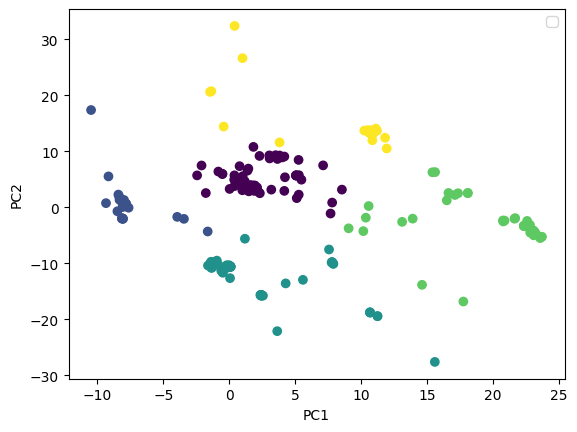

In [23]:

plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
# plt.scatter(X_pca[:,0], X_pca[:,1], c = blue)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

158


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


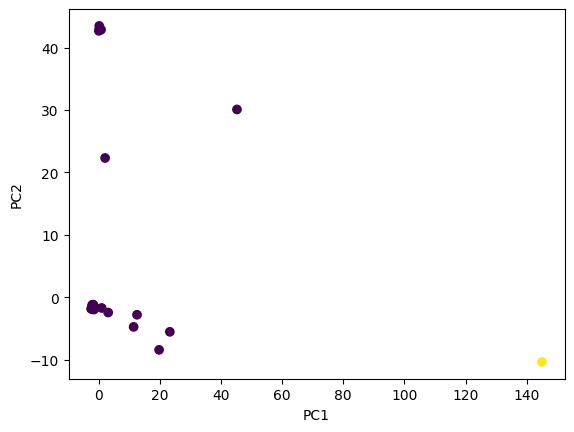

In [24]:
# n_components = 2  # update to be no greater than the number of features
# pca = PCA(n_components=2)
# scaler = StandardScaler()
# norm_pca = scaler.fit_transform(pcaVector_array)
# X_pca = pca.fit_transform(norm_pca)

# new = X_pca[:158, :]
# old = X_pca[158:, :]
# plt.scatter(new[:,0], new[:,1], c = labels)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()
# plt.scatter(old[:,0], old[:,1], c = labels)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

newSeq = get_normalized_kmer_counts(sequences1, k)#returns a list of kmer dictionary
print(len(newSeq))
pcaVectorList = []
for seq_dict in newSeq:
  v=[]
  for key, val in seq_dict.items():
    v.append(val)
  pcaVectorList.append(v)

pcaVector_array = np.array(pcaVectorList)
pcaVector_array.shape

# perform dimensionality reduction using PCA
import numpy as np
from sklearn.preprocessing import StandardScaler


# perform clustering using k-means
n_components = 2  # update to be no greater than the number of features
pca = PCA(n_components=2)
scaler = StandardScaler()
norm_pca = scaler.fit_transform(pcaVector_array)
X_pca = pca.fit_transform(norm_pca)
# print("X_pca:", X_pca)
# perform clustering using k-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
labels = kmeans.labels_
# print(X_pca.shape)
cl =X_pca[labels == 1]
c2 =X_pca[labels == 2]
# plot the scatter plot
# colors = ['red', 'blue']
# label = ['new', 'old']
# for i in range(n_components):
#     for j in range(len(label)):
#         plt.scatter(X_pca[j, 0], 0, c=colors[kmeans.labels_[j]], alpha=0.5)
# plt.xlabel('PC1')

plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


208


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


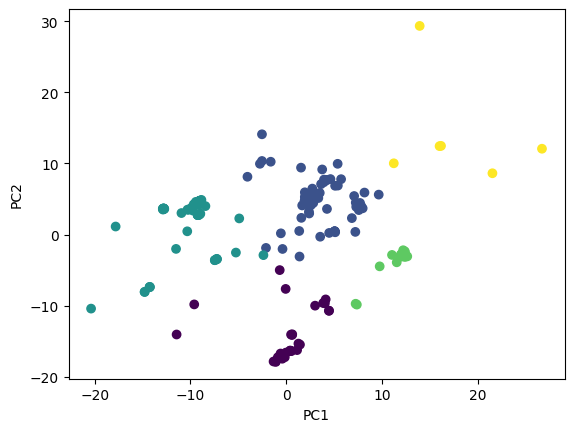

In [25]:
# n_components = 2  # update to be no greater than the number of features
# pca = PCA(n_components=2)
# scaler = StandardScaler()
# norm_pca = scaler.fit_transform(pcaVector_array)
# X_pca = pca.fit_transform(norm_pca)



newSeq = get_normalized_kmer_counts(sequences2, k)#returns a list of kmer dictionary
print(len(newSeq))
pcaVectorList = []
for seq_dict in newSeq:
  v=[]
  for key, val in seq_dict.items():
    v.append(val)
  pcaVectorList.append(v)

pcaVector_array = np.array(pcaVectorList)
pcaVector_array.shape

# perform dimensionality reduction using PCA
import numpy as np
from sklearn.preprocessing import StandardScaler


# perform clustering using k-means
n_components = 2  # update to be no greater than the number of features
pca = PCA(n_components=2)
scaler = StandardScaler()
norm_pca = scaler.fit_transform(pcaVector_array)
X_pca = pca.fit_transform(norm_pca)
# print("X_pca:", X_pca)
# perform clustering using k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
labels = kmeans.labels_
# print(X_pca.shape)

# plot the scatter plot
# colors = ['red', 'blue']
# label = ['new', 'old']
# for i in range(n_components):
#     for j in range(len(label)):
#         plt.scatter(X_pca[j, 0], 0, c=colors[kmeans.labels_[j]], alpha=0.5)
# plt.xlabel('PC1')

plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Question 1

In [6]:
#Question 1 (PC for first 20): 
import matplotlib.pyplot as plt

eigenval: [ 2.46400e+01  2.21336e+01  1.91676e+01 ...  1.19292e-02  1.15599e-02
 -2.49000e-12]
(1063,)
Percentage of variance explained by the first 20 PCs: 0.2577337662979617
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
y [24.64, 22.1336, 19.1676, 16.5371, 15.6505, 15.2051, 14.0765, 13.9165, 13.526, 13.0129, 12.4595, 11.8441, 11.7914, 11.327, 11.1497, 10.8613, 10.6832, 10.5186, 9.98179, 9.60199]


Text(0, 0.5, 'Variance')

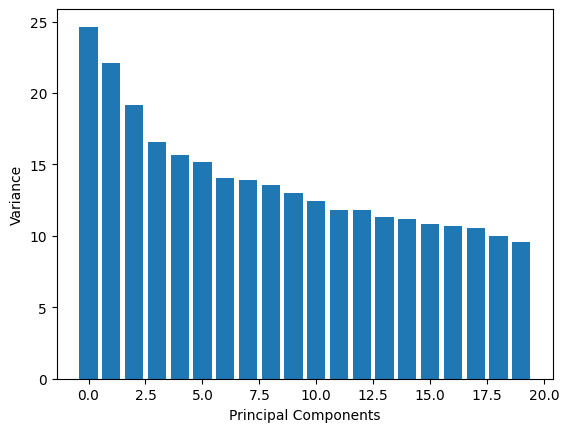

In [8]:
import numpy as np
import pandas as pd

eigenval_path = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/hw4/data.eigenval'

# with open(eigenval_path, 'r') as file:
#     eigenvals = file.read().split("\n")
# eigenvals.pop()

eigenvals = pd.read_csv(eigenval_path, header=None, names=['eigenvalue'])
eigenval = np.array(eigenvals).flatten()
print("eigenval:", eigenval)
print(eigenval.shape)

tot = np.sum(eigenval)
tmp = 0 
y = []

for i,val in enumerate(eigenval):
  if i==20:
    break
  tmp+=val
  y.append(val)  
  

var_explained = tmp/tot

print("Percentage of variance explained by the first 20 PCs:", var_explained)

x = [i for i in range(20)]
print(x)
print('y',y)
plt.bar(x,y)
plt.xlabel("Principal Components")
plt.ylabel("Variance")

In [37]:
path = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/hw4/data.PHENO1.glm.linear'
df = pd.read_csv(path, sep='\t')


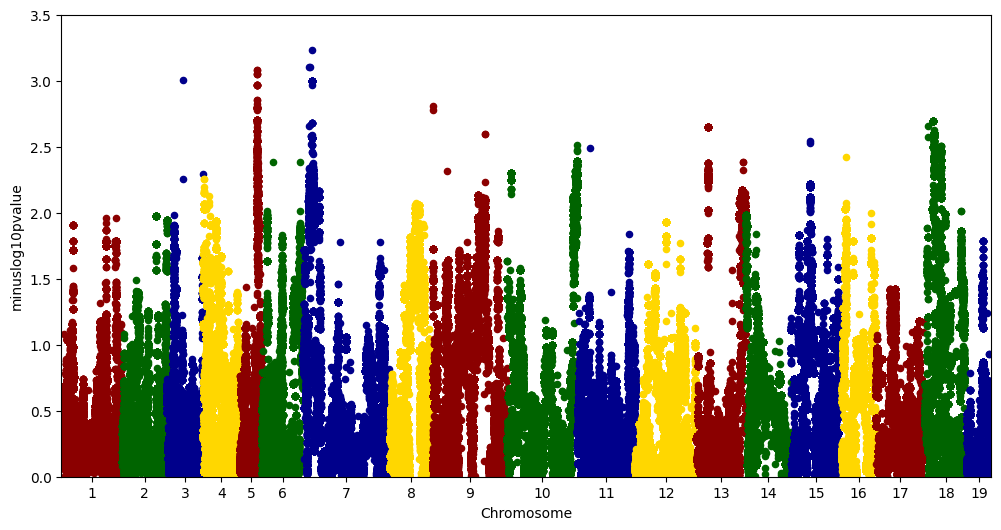

In [38]:
#1a (Manhattan plot)
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

df['minuslog10pvalue'] = -np.log10(df.P)
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('#CHROM'))

# manhattan plot
fig = plt.figure(figsize=(12, 6)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])

# x axis label
ax.set_xlabel('Chromosome')

# show the graph
plt.show()


In [39]:
index = df['P'].idxmin()
loci = df.loc[index]
print(loci) #Significant loci

#CHROM                       7
POS                   34440906
ID                  rs32316278
REF                          C
ALT                          T
A1                           T
TEST                       ADD
OBS_CT                     881
BETA                 -0.078065
SE                    0.022608
T_STAT                -3.45299
P                     0.000581
ERRCODE                      .
minuslog10pvalue      3.235909
ind                     140995
Name: 140995, dtype: object


In [40]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

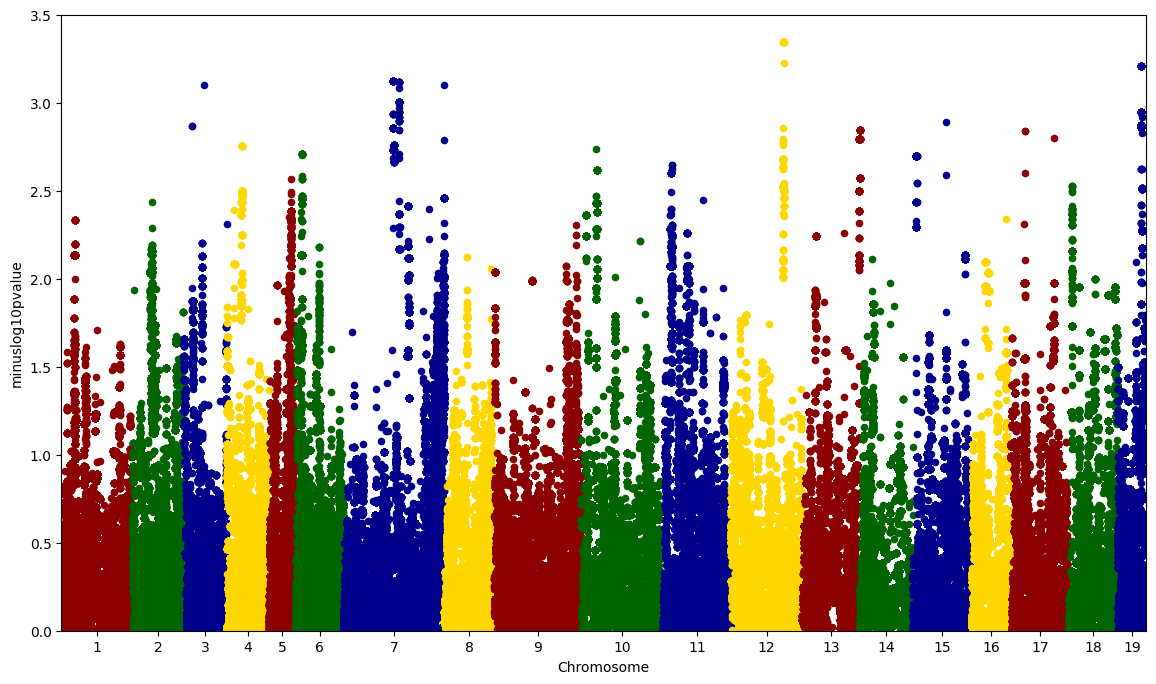

In [41]:
#Manhattan plot for corrected

pca_path = '/content/drive/MyDrive/Colab Notebooks/Computational Genomics/hw4/datapca.PHENO1.glm.linear'
df = pd.read_csv(pca_path, sep='\t')

df['minuslog10pvalue'] = -np.log10(df.P)
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('#CHROM'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])

# x axis label
ax.set_xlabel('Chromosome')

# show the graph
plt.show()


In [42]:
index = df['P'].idxmin()
loci = df.loc[index]
print(loci)

#CHROM                       5
POS                  127336822
ID                  rs47266400
REF                          T
ALT                          C
A1                           C
TEST                       ADD
OBS_CT                     881
BETA                 -0.146281
SE                    0.034578
T_STAT                -4.23048
P                     0.000026
ERRCODE                      .
minuslog10pvalue      4.580183
ind                     110210
Name: 110210, dtype: object


eigenval: [ 2.46400e+01  2.21336e+01  1.91676e+01 ...  1.19292e-02  1.15599e-02
 -2.49000e-12]
(1063,)
Percentage of variance explained by the first 150 PCs: 0.7527233260918365
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
y [24.64, 22.1336, 19.1676, 16.5371, 15.6505, 15.2051, 14.0765, 13.9165, 13.526, 13.0129, 12.4595, 11.8441, 11.7914, 11.327, 11.1497, 10.8613, 10.6832, 10.5186, 9.98179, 9.60199, 9.4

<BarContainer object of 150 artists>

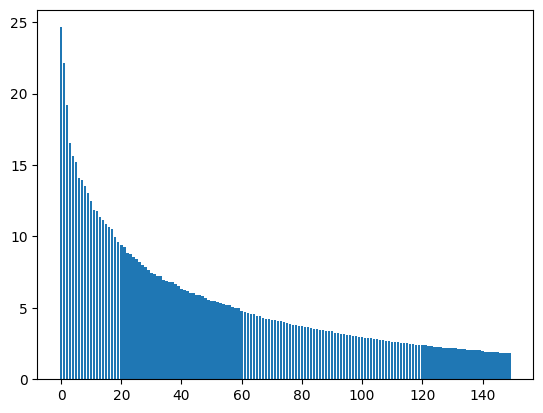

In [25]:
#PCA for first 150 PC

eigenvals = pd.read_csv(eigenval_path, header=None, names=['eigenvalue'])
eigenval = np.array(eigenvals).flatten()
print("eigenval:", eigenval)
print(eigenval.shape)

tot = np.sum(eigenval)
tmp = 0 
y = []

for i,val in enumerate(eigenval):
  if i==150:
    break
  tmp+=val
  y.append(val)  
  

var_explained = tmp/tot

print("Percentage of variance explained by the first 150 PCs:", var_explained)

x = [i for i in range(150)]
print(x)
print('y',y)
plt.bar(x,y)